In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import spacy
import string

import re


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dropout
from keras.regularizers import l1, l2

from collections import Counter

# Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Course/Data Science/Project/Cyber Bulling Text Prediction/cyberbullying_tweets.csv")
df.head(3)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [ ]:
df.duplicated().sum()

36

In [ ]:
df = df.drop_duplicates()

In [ ]:
df['cyberbullying_type'].value_counts()

religion               7997
age                    7992
ethnicity              7959
gender                 7948
not_cyberbullying      7937
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [ ]:
text = df['tweet_text'].astype(str)

# EDA

In [ ]:
from collections import Counter

In [ ]:
def Most_Words_used(data, num_of_words, type_of_bullying) :
    all_text = ''.join(data['tweet_text'][data['cyberbullying_type'] == type_of_bullying].values)

    all_text = re.sub(r'http\S+', '', all_text)
    all_text = re.sub(r'@\S+', '', all_text)
    all_text = re.sub(r'#\S+', '', all_text)
    all_text = re.sub(r'\d+', '',all_text)
    all_text = re.sub(r'[^\w\s]', '',all_text)


    words = all_text.split()

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]

    word_counts = Counter(words)

    top_words = word_counts.most_common(num_of_words)

    return top_words

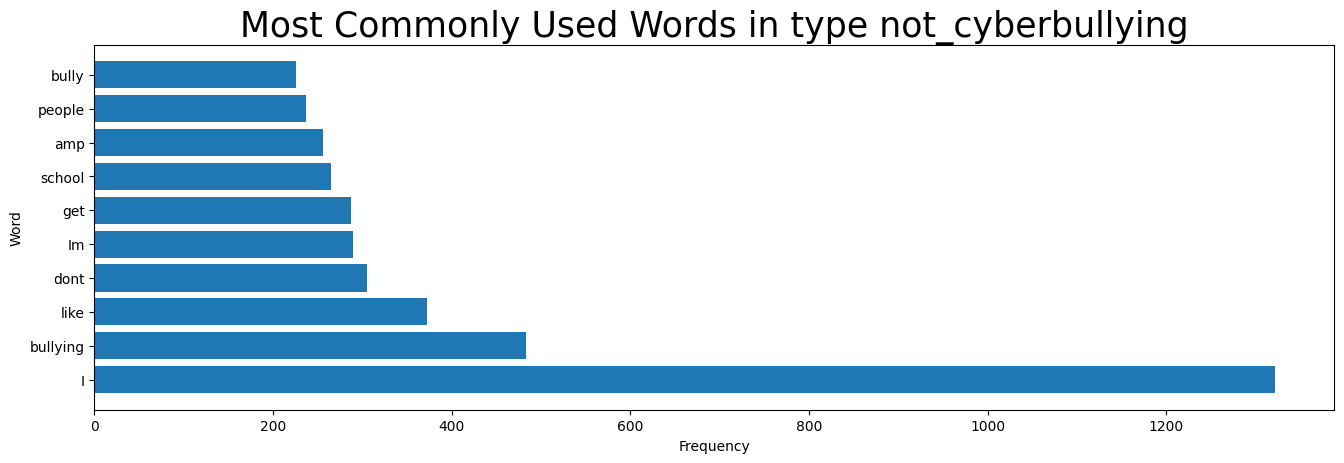

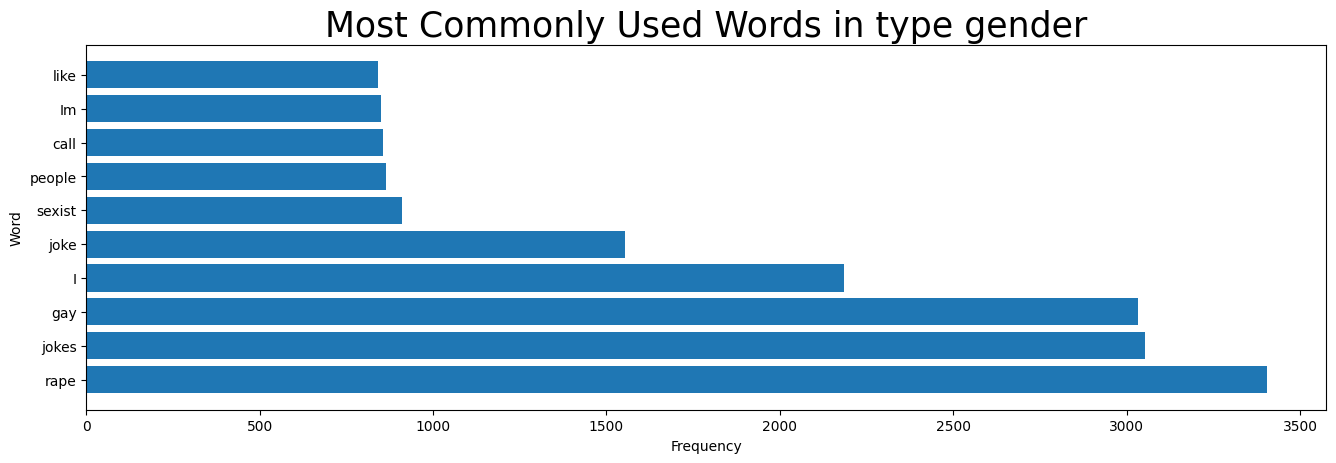

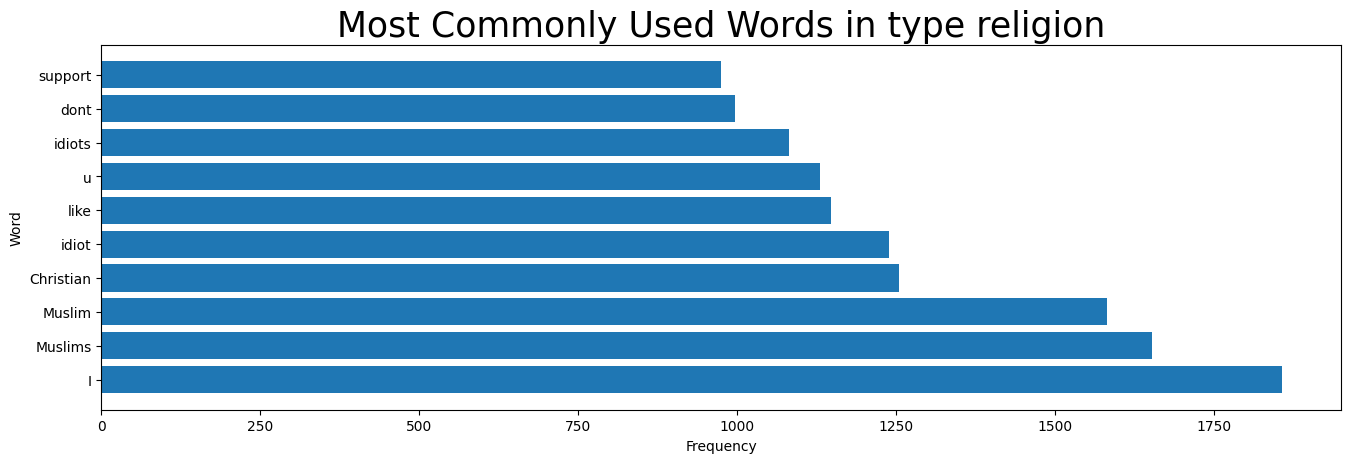

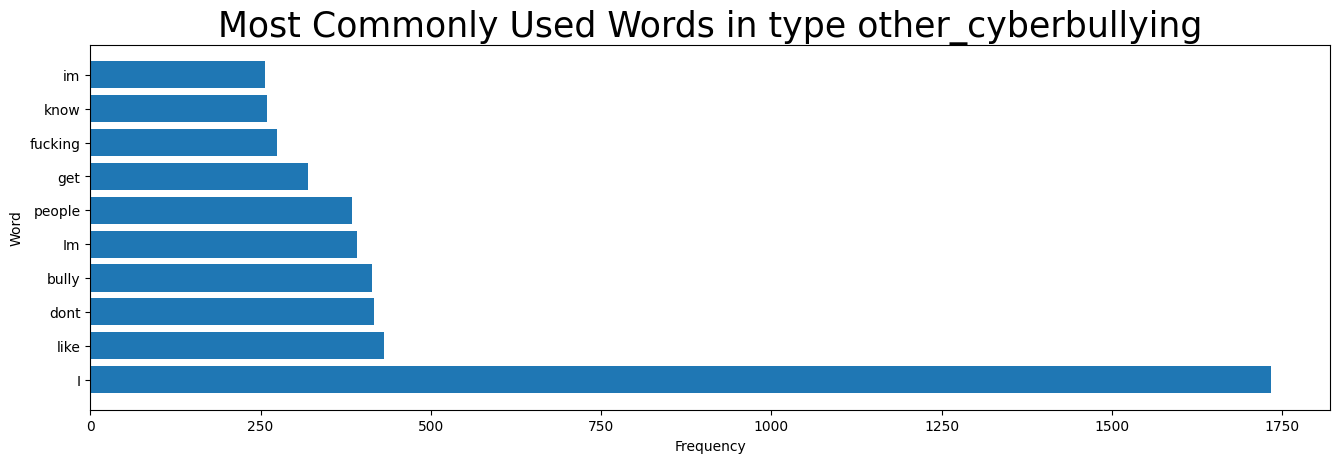

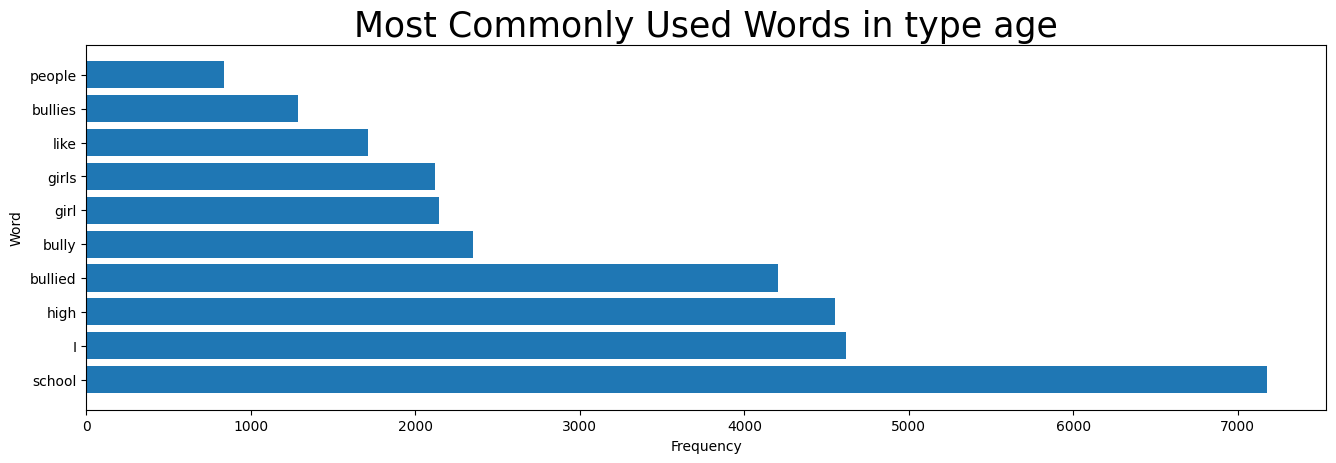

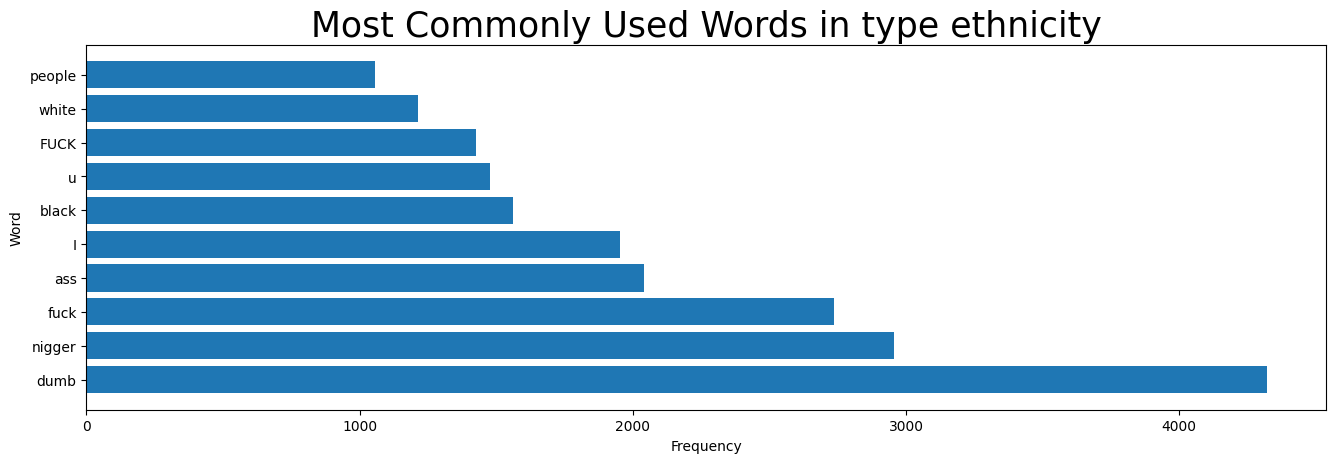

In [ ]:
bullying_type = df['cyberbullying_type'].unique()
for _type in bullying_type:
  top_words = Most_Words_used(df, 10, _type)

  xaxis = [word[0] for word in top_words]
  yaxis = [word[1] for word in top_words]

  plt.figure(figsize=(16,5))
  plt.barh(xaxis , yaxis)
  plt.xlabel('Frequency')
  plt.ylabel('Word')
  plt.title(f'Most Commonly Used Words in type {_type}', fontsize=25)
  plt.subplots_adjust(bottom=0.15)
  plt.show()

# Text Processing

## Cleansing

In [ ]:
def cleansing(text):
    text = text.apply(lambda x: re.sub(r'http\S+', '', x))
    text = text.apply(lambda x: re.sub(r'@\S+', '', x))
    text = text.apply(lambda x: re.sub(r'#\S+', '', x))
    text = text.apply(lambda x: re.sub(r'\d+', '', x))
    text = text.apply(lambda x: re.sub(r'[^\w\s]|[\d]', '', x))
    text = text.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
    text = text.apply(lambda x: re.sub(r'@\w+|\#\w+', '', x))
    text = text.str.replace(r'\s+', ' ')
    return text.str.strip()

## Tokenization

In [ ]:
def tokenization(text):
  text = text.apply(lambda x: word_tokenize(x))
  return text

## Removing Stopwords

In [ ]:
def removing_stopwords(tokens):
  filter = []
  stop_words = set(stopwords.words('english'))
  for token in tokens:
    if token not in stop_words:
      filter.append(token)
  return filter

## Lemmatization

In [ ]:
def lemmatize(data):
  lem_text = []
  lem = WordNetLemmatizer()
  for word in data:
    lem_text.append(lem.lemmatize(word, 'v'))
  return ' '.join(lem_text).lower()

## Removing Non Valuable Words For Categorization

In [ ]:
def remove_NoV_word(text, word):
  NoV_word = word

  # Menghapus kata-kata tertentu dari teks
  for word in NoV_word:
      text = text.replace(word, ' ')

  return text.strip()


## Final Result

In [ ]:
clear_text = text.copy()

In [ ]:
clear_text = cleansing(clear_text)
clear_text = tokenization(clear_text)
clear_text = clear_text.apply(lambda x: removing_stopwords(x))
clear_text = clear_text.apply(lambda x: lemmatize(x))
# clear_text = clear_text.apply(lambda x: remove_NoV_word(x, [' i ', ' u ', ' people ', ' im ']))

<ipython-input-13-e944aea08dd4>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace(r'\s+', ' ')


In [ ]:
clear_text

0                                in word food crapilicious
1                                                why white
2                      classy whore or red velvet cupcakes
3        meh p thank head concern another angry dude tw...
4        this isis account pretend kurdish account like...
                               ...                        
47687    black ppl arent expect anything depend anythin...
47688    turner withhold disappointment turner call cou...
47689    i swear god this dumb nigger bitch i get bleac...
47690    yea fuck rt if youre a nigger fucking unfollow...
47691    bro u get ta chill rt dog fuck kp dumb nigger ...
Name: tweet_text, Length: 47656, dtype: object

In [ ]:
df_eda = df.copy()
df_eda['tweet_text'] = clear_text
df_eda = df_eda.drop(df_eda[df_eda['cyberbullying_type'] == 'other_cyberbullying'].index).reset_index()

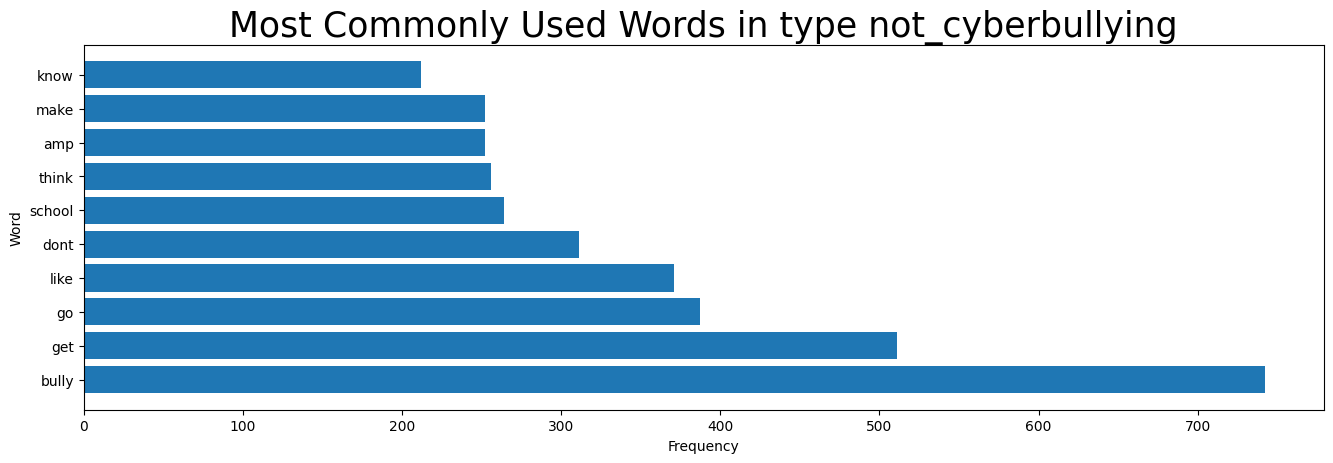

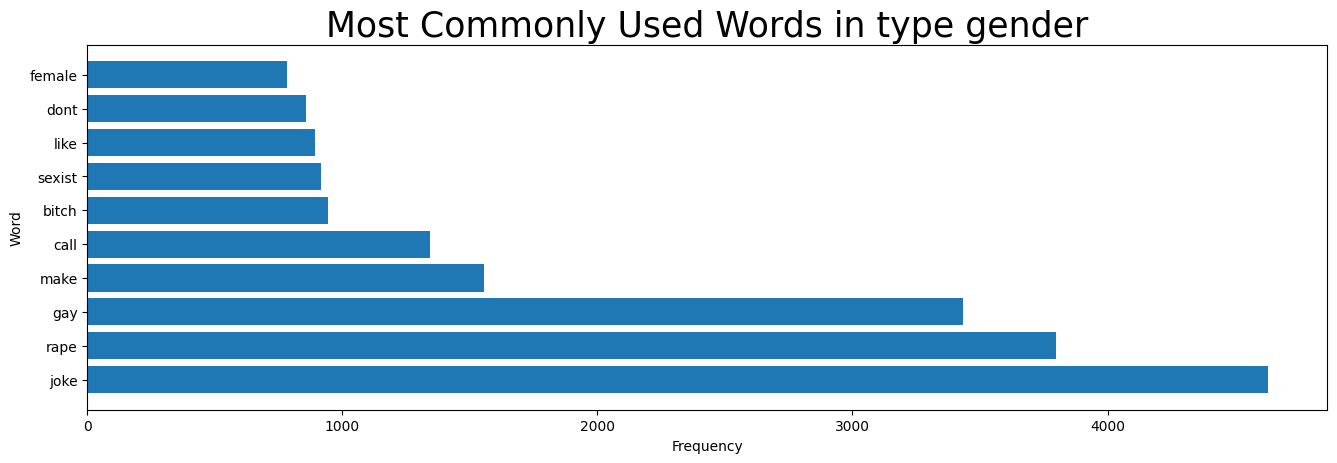

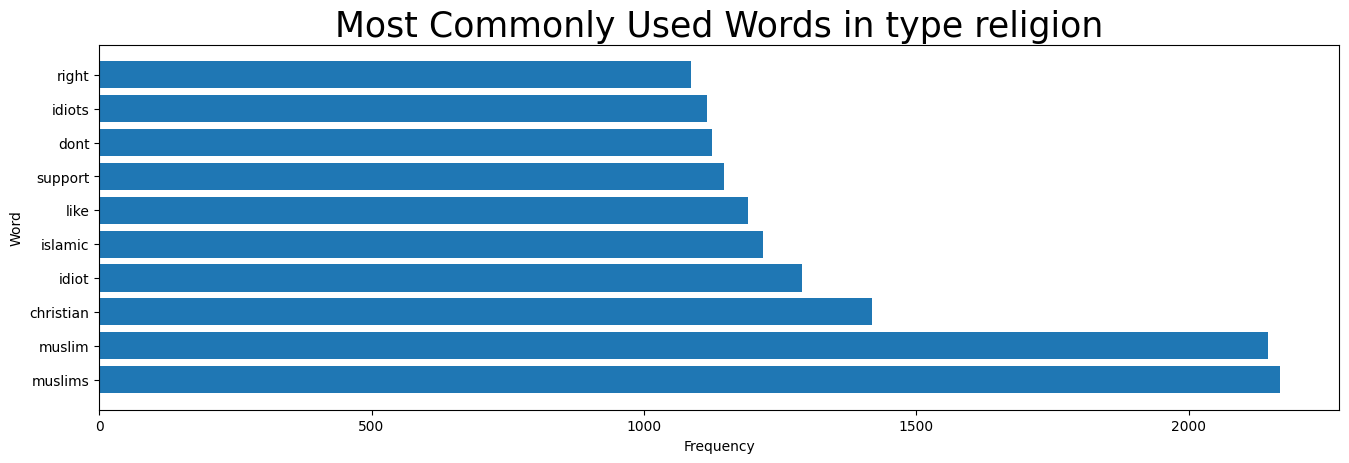

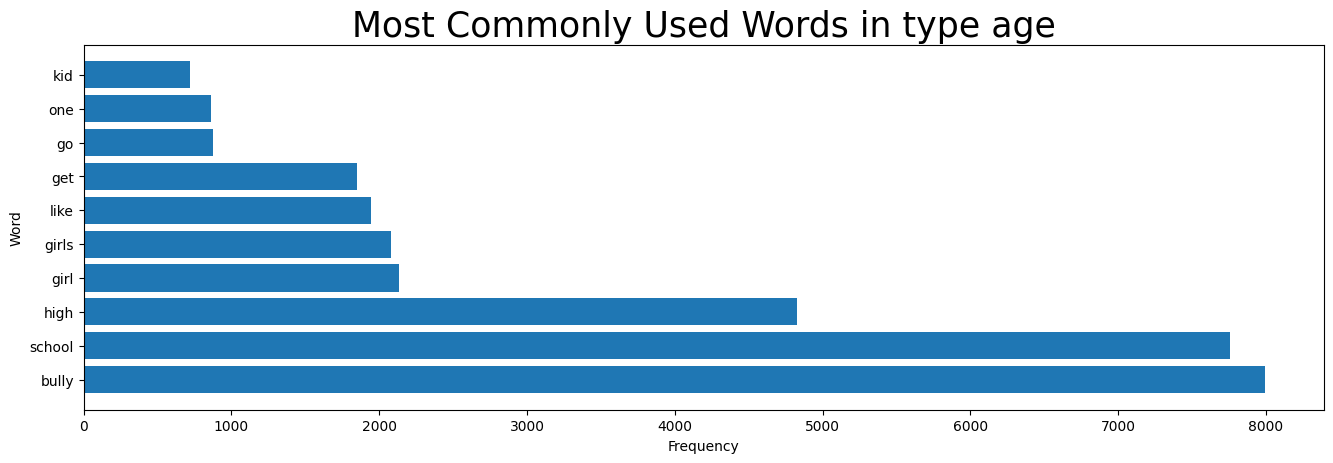

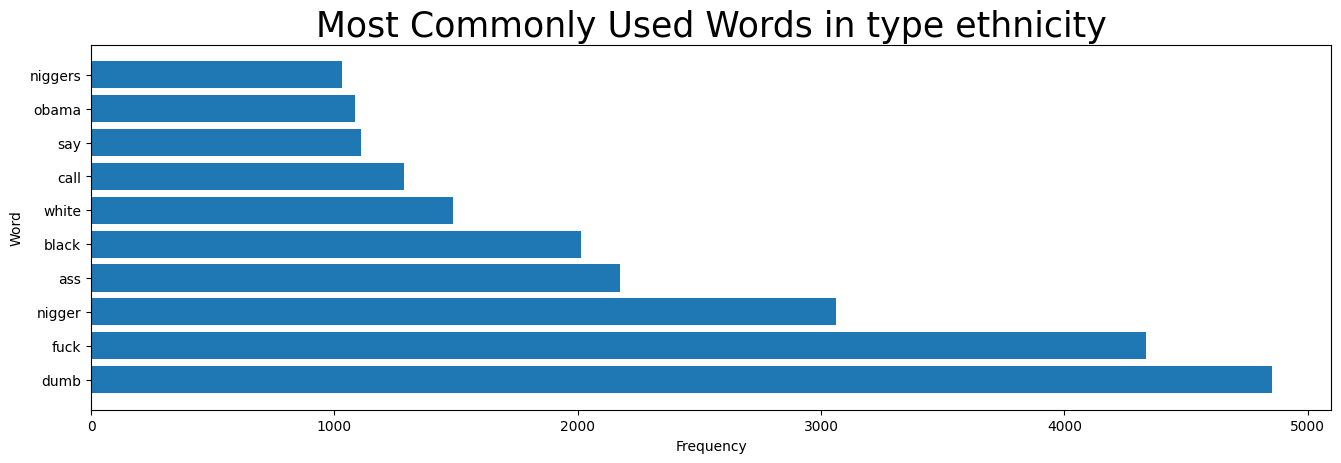

In [ ]:
bullying_type = df_eda['cyberbullying_type'].unique()
for _type in bullying_type:
  top_words = Most_Words_used(df_eda, 10, _type)

  xaxis = [word[0] for word in top_words]
  yaxis = [word[1] for word in top_words]

  plt.figure(figsize=(16,5))
  plt.barh(xaxis , yaxis)
  plt.xlabel('Frequency')
  plt.ylabel('Word')
  plt.title(f'Most Commonly Used Words in type {_type}', fontsize=25)
  plt.subplots_adjust(bottom=0.15)
  plt.show()

# Data Preprocessing

In [ ]:
df_tmp = df.copy()

In [ ]:
df_tmp['tweet_text'] = clear_text

In [ ]:
df_tmp = df_tmp.drop(df[df['cyberbullying_type'] == 'other_cyberbullying'].index).reset_index()

## Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

col = 'cyberbullying_type'

le = LabelEncoder()
le.fit(df_tmp[col])

df_tmp[col] = le.transform(df_tmp[col])

In [ ]:
df_true = df.drop(df[df['cyberbullying_type'] == 'other_cyberbullying'].index).reset_index()['cyberbullying_type']
dictionary = dict(zip(df_true, df_tmp['cyberbullying_type']))

print("The result after the encoding:")
for nama_kolom, nilai_encoded in dictionary.items():
    print(f"{nama_kolom}: {nilai_encoded}")

The result after the encoding:
not_cyberbullying: 3
gender: 2
religion: 4
age: 0
ethnicity: 1


In [ ]:
df_tmp

,index,tweet_text,cyberbullying_type
0,0,in word food crapilicious,3
1,1,why white,3
2,2,classy whore or red velvet cupcakes,3
3,3,meh p thank head concern another angry dude tw...,3
4,4,this isis account pretend kurdish account like...,3
...,...,...,...
39828,47687,black ppl arent expect anything depend anythin...,1
39829,47688,turner withhold disappointment turner call cou...,1
39830,47689,i swear god this dumb nigger bitch i get bleac...,1
39831,47690,yea fuck rt if youre a nigger fucking unfollow...,1


# Split Data To Traning and Test Data

In [ ]:
X = df_tmp['tweet_text']
y = df_tmp['cyberbullying_type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
vectorizer   = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_vecs = vectorizer.transform(X_train)
X_test_vecs  = vectorizer.transform(X_test)



In [ ]:
X_train_vecs

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences  = tokenizer.texts_to_sequences(X_test)



In [ ]:
token_lengths = [len(sequence) for sequence in X_train_sequences]
mean_length   = np.mean(token_lengths)
median_length = np.median(token_lengths)
max_length    = int(mean_length + 2 * np.std(token_lengths))

print(f"Mean Token Length   : {mean_length}")
print(f"Median Token Length : {median_length}")
print(f"Max Token Length    : {max_length}")

# Modelling

In [ ]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    # 'Gradient Boosting': GradientBoostingClassifier()
}

for name, classifier in classifiers.items():
    classifier.fit(X_train_vecs, y_train)
    y_pred = classifier.predict(X_test_vecs)

    accuracy    = accuracy_score(y_test, y_pred)
    report      = classification_report(y_test, y_pred)

    print(f"--------------------- {name} ---------------------")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)
    # sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=None, xticklabels=class_labels, yticklabels=class_labels)


--------------------- Logistic Regression ---------------------
Accuracy: 0.9127651562696122
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1596
           1       0.98      0.98      0.98      1597
           2       0.92      0.83      0.88      1577
           3       0.78      0.83      0.81      1630
           4       0.95      0.95      0.95      1567

    accuracy                           0.91      7967
   macro avg       0.92      0.91      0.91      7967
weighted avg       0.91      0.91      0.91      7967

--------------------- Decision Tree ---------------------
Accuracy: 0.9009664867578763
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1596
           1       0.98      0.96      0.97      1597
           2       0.85      0.83      0.84      1577
           3       0.77      0.80      0.79      1630
           4

In [ ]:
xgb_class = XGBClassifier()

xgb_class.fit(X_train_vecs, y_train)
y_pred = classifier.predict(X_test_vecs)

accuracy    = accuracy_score(y_test, y_pred)
report      = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9216769172837956
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1596
           1       0.99      0.98      0.98      1597
           2       0.92      0.83      0.87      1577
           3       0.79      0.87      0.83      1630
           4       0.94      0.96      0.95      1567

    accuracy                           0.92      7967
   macro avg       0.93      0.92      0.92      7967
weighted avg       0.92      0.92      0.92      7967



# Prediction Text